In [1]:
from model import *
from data import *
from PIL import Image
import cv2

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
trainGene = trainGenerator(4,
                           '/data/spacenet/bldg/AllTrain-Old',
                           'PAN-PNG',
                           'GT-PNG',
                           data_gen_args,
                           save_to_dir = None)
validGene = trainGenerator(4,
                           '/data/spacenet/bldg/AllTest-Old',
                           'PAN-PNG',
                           'GT-PNG',
                           data_gen_args,
                           save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('/lfs/jonas/oldunet/weights.hdf5', 
                                   monitor='loss',
                                   verbose=1, 
                                   save_best_only=True)

In [3]:
model.load_weights('/lfs/jonas/oldunet/weights.hdf5')

In [4]:

#model.fit(trainGene,
#          steps_per_epoch=2000,
#          epochs=10,
#          callbacks=[model_checkpoint], 
#          validation_data=validGene, 
#          validation_steps=2,
#          verbose=2)

In [5]:
from glob import glob
import random
from skimage.io import imread
from matplotlib import pyplot as plt
import skimage.transform as trans
test_path = '/data/spacenet/bldg/AllTest/PAN-PNG/'
test_images = glob(test_path + '*.png')
image_size = (256, 256, 1)
sample_size = 4

In [6]:
test_sample = random.sample(test_images, sample_size)
samp_imgs = []
for sample in test_sample:
    samp_img = imread(sample)
    #ranCor = np.int16(random.uniform(0, samp_img.shape[0]-image_size[0]))
    #samp_img = samp_img[ranCor:ranCor+image_size[0], ranCor:ranCor+image_size[1]].reshape(image_size)
    samp_img = trans.resize(samp_img, image_size)
    samp_imgs += [samp_img]
samp_imgs = np.array(samp_imgs)

In [9]:
preds = model.predict(samp_imgs)

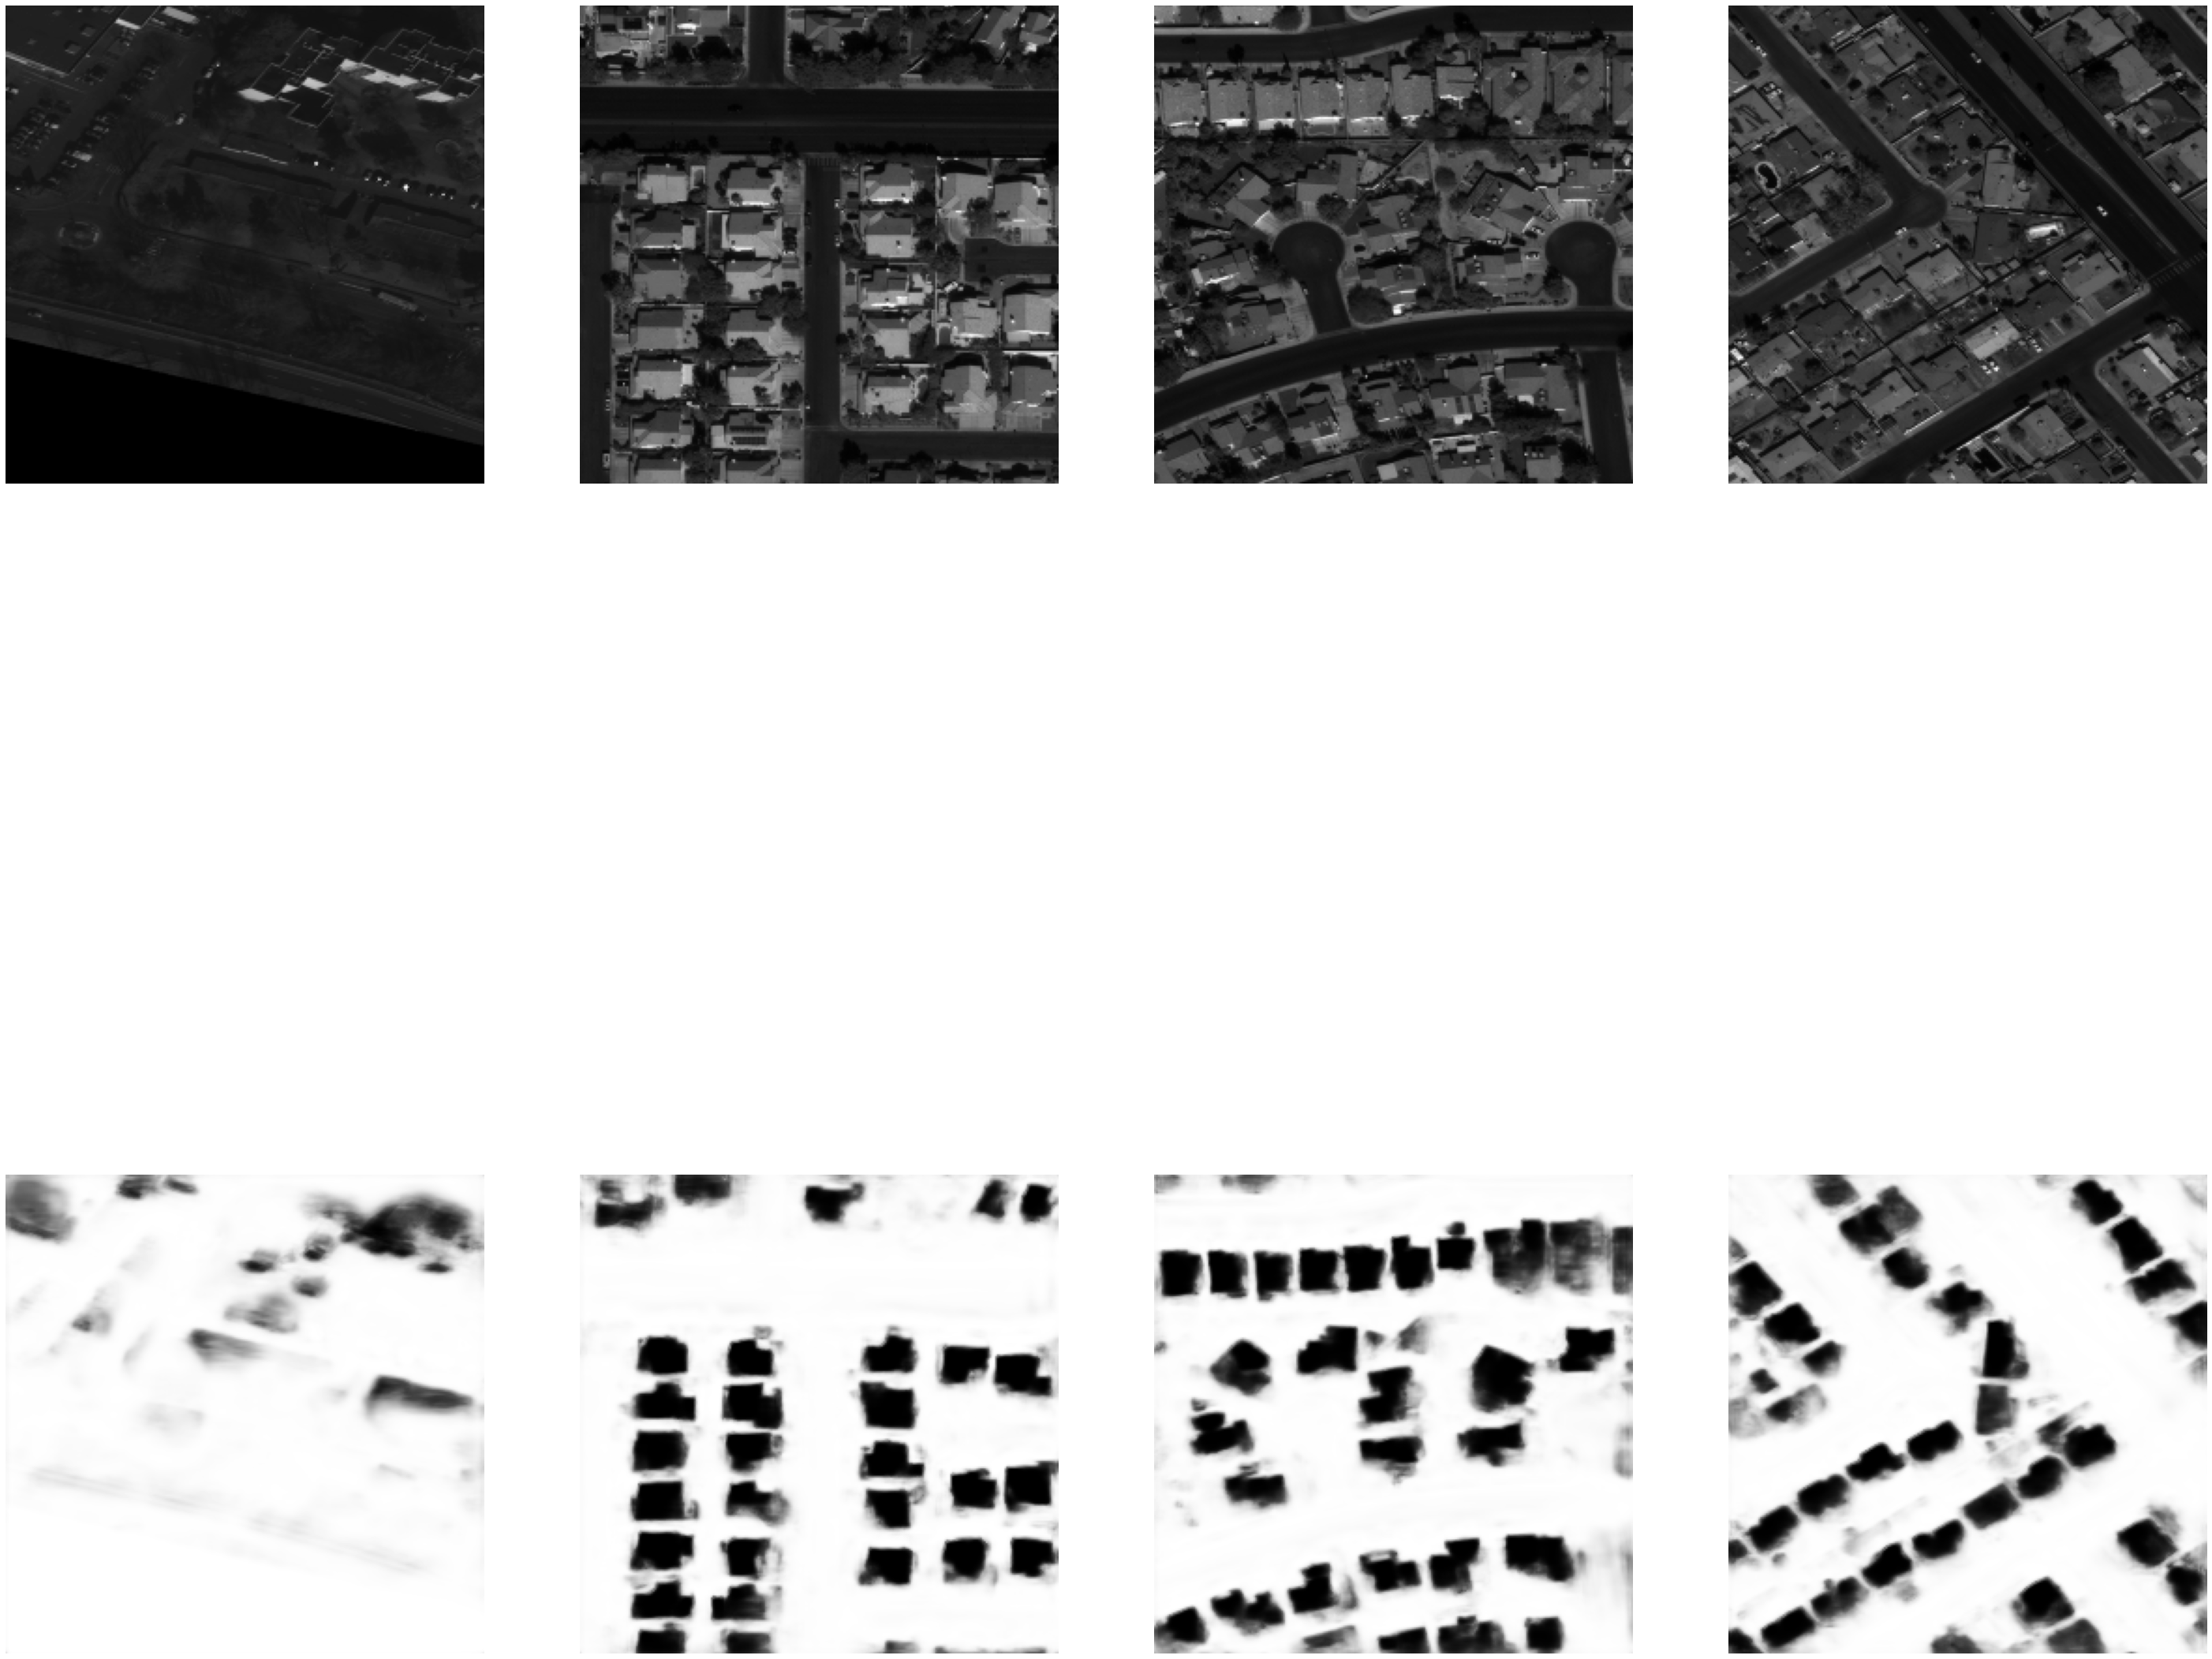

In [10]:
fig, axs = plt.subplots(2, sample_size, figsize=(50, 50))
for idx, ax in enumerate(axs[0]):
    ax.imshow(samp_imgs[idx, :, :, 0], cmap='gray')
    ax.axis('off')
for idx, ax in enumerate(axs[1]):
    ax.imshow(preds[idx, :, :, 0], cmap = 'gray')
    ax.axis('off')

In [12]:
preds.shape

(4, 256, 256, 1)

In [61]:
threshes = []
for pred in preds:
    pred = np.int16(pred * 255)[:,:,0]
    gray = cv2.cvtColor(pred, cv2.COLOR_BGR2GRAY)
    #blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    #thresh = cv2.threshold(gray, 0.25, 1, cv2.THRESH_BINARY)[1]
    ret2,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.imshow(thresh)
    threshes += [thresh]
threshes = np.array(threshes)

error: OpenCV(4.4.0) ../modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = (cv::impl::<unnamed>::SizePolicy)2; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


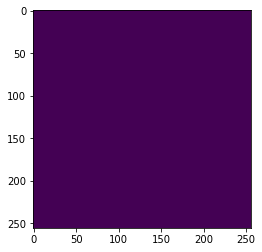

In [22]:
#threshes.shape
plt.imshow(threshes[0,:,:])